# Подготовка датасета


In [1]:
# Загрузка модуля pandas
import pandas as pd
# Загрузка файлов из облака
import gdown
# Библиотека для работы с массивами данных
import numpy as np
#Библиотека для построения графиков
import matplotlib.pyplot as plt
# Команда для отображения графики в ячейках среды Google Colaboratory
%matplotlib inline
# Библиотека для построения графиков
import seaborn as sns
import math
import re
import os.path

from IPython.display import clear_output
# Для работы с датами
from datetime import datetime


In [2]:
# Загрузка файла из облака в colab
import gdown
gdown.download('https://drive.google.com/uc?id=1HneSc4fEx4ayjOU2CwFMzr3pdWW3wK58', None, quiet=True)


'dataset1.csv'

In [3]:
data = pd.read_csv('dataset1.csv')

data_backup = data.copy()

In [ ]:
data

In [4]:
# Параметр index_col определяет столбец, который будет использоваться как индекс в таблице
data = pd.read_csv('dataset1.csv', index_col=0)

# Вывод первых 10 строк таблицы
data.head(10)

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
id_ответа,,,,,,,,,,,,,,,,,,,,
1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True,False,0,Возможно есть мутации и эффективность Дурвалум...
6,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,не исследовались,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...
7,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,EGFR редкий вариант,Не исследовался,Результативность лечения,Наблюдение,True,False,False,0,"Возможна низкая эффективность Дурвалумаба, Оси..."
8,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,EGFR редкий вариант,Не исследовался,Результативность лечения,Наблюдение,True,False,False,0,"Возможна низкая эффективность Дурвалумаба, Оси..."
9,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,EGFR редкий вариант,Не исследовался,Результативность лечения,Наблюдение,True,False,False,0,0


In [162]:
data.count()

Раса                                                        248832
Пол                                                         248832
Возраст                                                     248832
Статус курения                                              248832
ECOG                                                        248832
Есть опухолевая нагрузка? (симптомная опухоль)              248832
Ко-мутации KRAS                                             248832
Ко-мутации p53.                                             248832
Ко-мутации STK11                                            248832
Ко-мутации KEAP1                                            248832
Срок от окончания ХЛТ                                       248832
Молекулярный статус (только для неплоскоклеточного рака)    248832
PD-L1 статус                                                248832
Предпочтение пациента по ответу на терапию                  248832
Ответ эксперта (Лактионов)                                  24

In [5]:
data = data.iloc[:,0:17] # убираем два последних столбца, т.к. они не имеют значения для работы
data.head()

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%
id_ответа,,,,,,,,,,,,,,,,,
1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False
2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False
3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True
4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True
5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб,False,True


In [164]:
data.describe()

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%
count,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832,248832
unique,3,2,2,3,2,2,2,2,2,2,3,6,3,2,4,2,2
top,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,False
freq,82944,124416,124416,82944,124416,124416,124416,124416,124416,124416,82944,41472,82944,124416,140544,158976,158976


In [165]:

data.nunique()

Раса                                                        3
Пол                                                         2
Возраст                                                     2
Статус курения                                              3
ECOG                                                        2
Есть опухолевая нагрузка? (симптомная опухоль)              2
Ко-мутации KRAS                                             2
Ко-мутации p53.                                             2
Ко-мутации STK11                                            2
Ко-мутации KEAP1                                            2
Срок от окончания ХЛТ                                       3
Молекулярный статус (только для неплоскоклеточного рака)    6
PD-L1 статус                                                3
Предпочтение пациента по ответу на терапию                  2
Ответ эксперта (Лактионов)                                  4
Поставьте галочку, если уверены на 100%                     2
Если 75%

In [6]:
# Объединяем два последних столбца
def getYColumnOhe(values): # слепим все значения в строке
  y_data = []
  for val in values:
    currentStr = ''
    for i in range(len(val)):
      currentStr += str(val[i])+' '
    y_data.append(currentStr)
  return y_data

In [7]:
# записываем в столбец Ответ эксперта значения трёх последних столбцов
data['Ответ эксперта (Лактионов)']=getYColumnOhe(data[['Ответ эксперта (Лактионов)','Поставьте галочку, если уверены на 100%','Если 75%']].values)


In [ ]:
data.head(5)

In [8]:
# убираю лишние столбцы
del data['Поставьте галочку, если уверены на 100%']
del data['Если 75%']

In [9]:
data.head(5)

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов)
id_ответа,,,,,,,,,,,,,,,
1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб True False
2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб True False
3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение False True
4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб False True
5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб False True


In [236]:
data.nunique()

Раса                                                        3
Пол                                                         2
Возраст                                                     2
Статус курения                                              3
ECOG                                                        2
Есть опухолевая нагрузка? (симптомная опухоль)              2
Ко-мутации KRAS                                             2
Ко-мутации p53.                                             2
Ко-мутации STK11                                            2
Ко-мутации KEAP1                                            2
Срок от окончания ХЛТ                                       3
Молекулярный статус (только для неплоскоклеточного рака)    6
PD-L1 статус                                                3
Предпочтение пациента по ответу на терапию                  2
Ответ эксперта (Лактионов)                                  9
dtype: int64

In [237]:
# перебираю все названия столбцов и для каждого вывожу список уникальных значений
for name, values in data.items():
  print(name, ":", data[name].unique())

Раса : ['Азиатская' 'Европейская' 'Другая']
Пол : [' Мужской' ' Женский']
Возраст : [' До 70' ' >70']
Статус курения : [' В настоящее время'
 ' Курение в прошлом (бросил более 1 месяца до 1 года)'
 ' Курение в прошлом (бросил более 1 года)']
ECOG : [' 0-1' '2']
Есть опухолевая нагрузка? (симптомная опухоль) : [' да' ' нет']
Ко-мутации KRAS : [' да' ' нет']
Ко-мутации p53. : [' да' ' нет']
Ко-мутации STK11 : [' да' ' нет']
Ко-мутации KEAP1 : [' да' ' нет']
Срок от окончания ХЛТ : ['до 42 дней' 'от 43 до 60 дней' 'более 61 дня']
Молекулярный статус (только для неплоскоклеточного рака) : [' нет мутаций' ' не исследовались' ' EGFR редкий вариант' ' EGFR ex19'
 ' EGFR ex21' ' ALK позитивный']
PD-L1 статус : [' Не исследовался' ' Менее 1%' ' Более 1%']
Предпочтение пациента по ответу на терапию : [' Результативность лечения' ' сохранение качества жизни']
Ответ эксперта (Лактионов) : ['Дурвалумаб True False ' 'Наблюдение False True '
 'Дурвалумаб False True ' 'Наблюдение True False '
 'Осимер

# Приведение датасета к векторному виду

In [10]:
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'
from tensorflow.keras import utils # Будем использовать эту библиотеку для

In [11]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 7

In [12]:
def get_columns_list(df):
  df1_colnames = data.columns.tolist()
  # print(f'названия колонок: {len(df1_colnames)}: {df1_colnames}')

  lst_count = len(df1_colnames)
  for i in range(lst_count):
    i_elem = df1_colnames[i]
    print(f"{i}->{lst_count}: '{i_elem}'")

  return df1_colnames

get_columns_list(data)

0->15: 'Раса'
1->15: 'Пол'
2->15: 'Возраст'
3->15: 'Статус курения'
4->15: 'ECOG'
5->15: 'Есть опухолевая нагрузка? (симптомная опухоль)'
6->15: 'Ко-мутации KRAS'
7->15: 'Ко-мутации p53.'
8->15: 'Ко-мутации STK11'
9->15: 'Ко-мутации KEAP1'
10->15: 'Срок от окончания ХЛТ'
11->15: 'Молекулярный статус (только для неплоскоклеточного рака)'
12->15: 'PD-L1 статус'
13->15: 'Предпочтение пациента по ответу на терапию'
14->15: 'Ответ эксперта (Лактионов)'


['Раса',
 'Пол',
 'Возраст',
 'Статус курения',
 'ECOG',
 'Есть опухолевая нагрузка? (симптомная опухоль)',
 'Ко-мутации KRAS',
 'Ко-мутации p53.',
 'Ко-мутации STK11',
 'Ко-мутации KEAP1',
 'Срок от окончания ХЛТ',
 'Молекулярный статус (только для неплоскоклеточного рака)',
 'PD-L1 статус',
 'Предпочтение пациента по ответу на терапию',
 'Ответ эксперта (Лактионов)']

In [13]:
# делаю словарь, где каждому значению индекса столбца сопоставляю массив уникальных значений ячейки, чтобы потом работать с индексами этого массива
data_colnames = data.columns.tolist() # названия столбцов записываю в список
def getDictionary(data):
  dict={} # будущий словарь

  for name in data_colnames: # перебираю названия столбцов
   index = data_colnames.index(name) # индекс столбца таблицы
   uniq = data[name].unique()
   if uniq[0]!='0':
     a = np.insert(uniq, 0, '0')
     dict[index] =a
   else:
    dict [index] = data[name].unique() # ключ - индекс, значение - список уникальных значений
  return dict

dictionaryDefault = getDictionary(data)
print(dictionaryDefault)

{0: array(['0', 'Азиатская', 'Европейская', 'Другая'], dtype=object), 1: array(['0', ' Мужской', ' Женский'], dtype=object), 2: array(['0', ' До 70', ' >70'], dtype=object), 3: array(['0', ' В настоящее время',
       ' Курение в прошлом (бросил более 1 месяца до 1 года)',
       ' Курение в прошлом (бросил более 1 года)'], dtype=object), 4: array(['0', ' 0-1', '2'], dtype=object), 5: array(['0', ' да', ' нет'], dtype=object), 6: array(['0', ' да', ' нет'], dtype=object), 7: array(['0', ' да', ' нет'], dtype=object), 8: array(['0', ' да', ' нет'], dtype=object), 9: array(['0', ' да', ' нет'], dtype=object), 10: array(['0', 'до 42 дней', 'от 43 до 60 дней', 'более 61 дня'],
      dtype=object), 11: array(['0', ' нет мутаций', ' не исследовались', ' EGFR редкий вариант',
       ' EGFR ex19', ' EGFR ex21', ' ALK позитивный'], dtype=object), 12: array(['0', ' Не исследовался', ' Менее 1%', ' Более 1%'], dtype=object), 13: array(['0', ' Результативность лечения', ' сохранение качества жизни

In [14]:
# преобразует данные таблицы в категориальный вид
def getArgmaxData(values):
  all_data = [] # Здесь будем хранить кодированные значения

  for val in values: # пребираю строки (они в виде списка)
    ohe = [] # закодированная строка  для x_data

    for i in range(len(val)):
      currentList =  dictionaryDefault[i].tolist() # находим список значений для каждого индекса
      currentIndex = currentList.index(val[i])
      a = np.argmax(list(utils.to_categorical(currentIndex, len(currentList)).astype('int')))
      ohe.append(a)
    all_data.append(ohe)

  return all_data




In [178]:
# проверяем работу ф-ии на маленьком датасете
data1 = data.iloc[0:3,]
data1_1 = getArgmaxData(data1.values)
data1_1

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2]]

In [15]:
all_data = getArgmaxData(data.values) # таблица полностью, значения в формате argmax


In [ ]:
all_data

In [16]:
categorical = pd.DataFrame(all_data,columns=data_colnames)

In [17]:
categorical.head(10)

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов)
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,3,1,1,1,2
3,1,1,1,1,1,1,1,1,1,1,1,2,1,1,3
4,1,1,1,1,1,1,1,1,1,1,2,2,1,1,3
5,1,1,1,1,1,1,1,1,1,1,3,2,1,1,2
6,1,1,1,1,1,1,1,1,1,1,1,3,1,1,4
7,1,1,1,1,1,1,1,1,1,1,2,3,1,1,4
8,1,1,1,1,1,1,1,1,1,1,3,3,1,1,4
9,1,1,1,1,1,1,1,1,1,1,1,4,1,1,5


## Исследую данные с помощью таблиц корелляции


<Axes: >

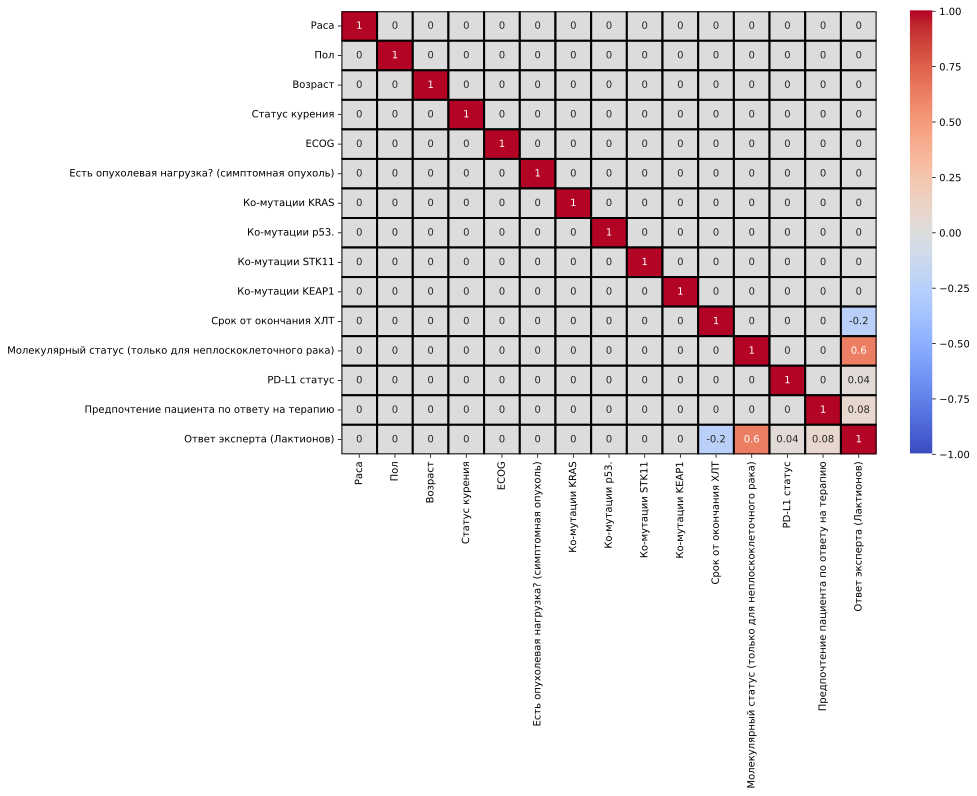

In [183]:
rcParams['figure.figsize'] = 12, 8 # увеличим размер графиков
# Метод, подсчитывающий попарную корреляцию для элементов.
corr_matrix = categorical.corr('spearman')
# Можно указать в параметрах способ подсчета.
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g')

<Axes: >

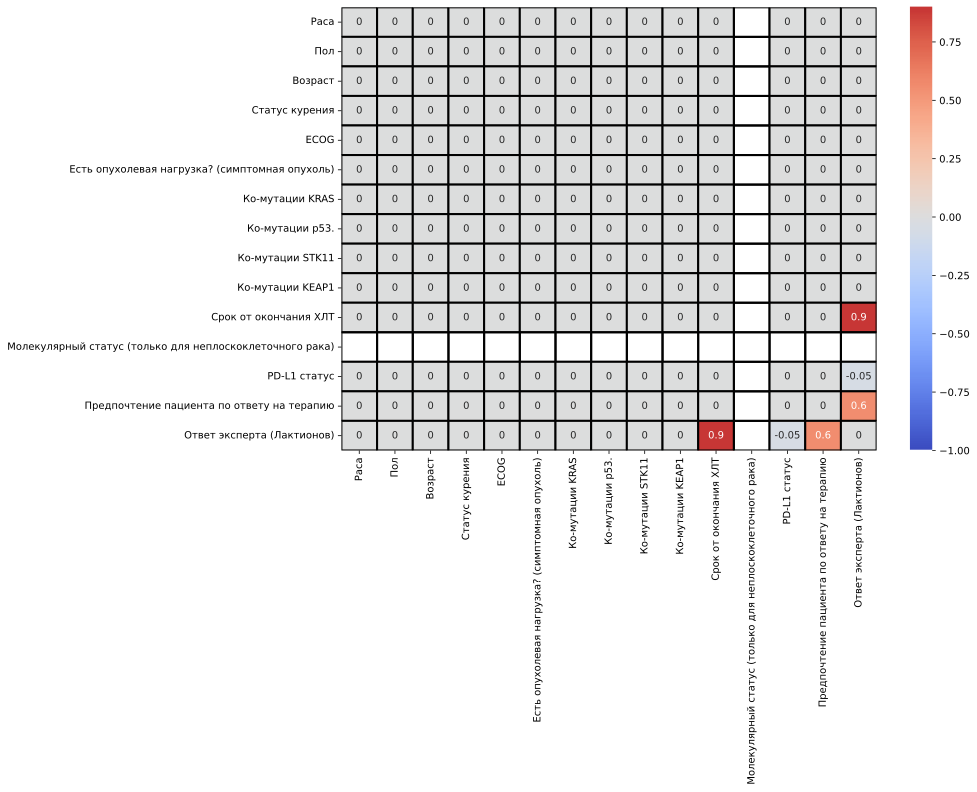

In [184]:
# Посмотрим на корреляцию для столбца Молекулярный статус (только для неплоскоклеточного рака)
corr_matrix = categorical[categorical['Молекулярный статус (только для неплоскоклеточного рака)'] == 1].corr('spearman')\
- categorical[categorical['Молекулярный статус (только для неплоскоклеточного рака)'] == 6].corr('spearman')
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g')

<Axes: >

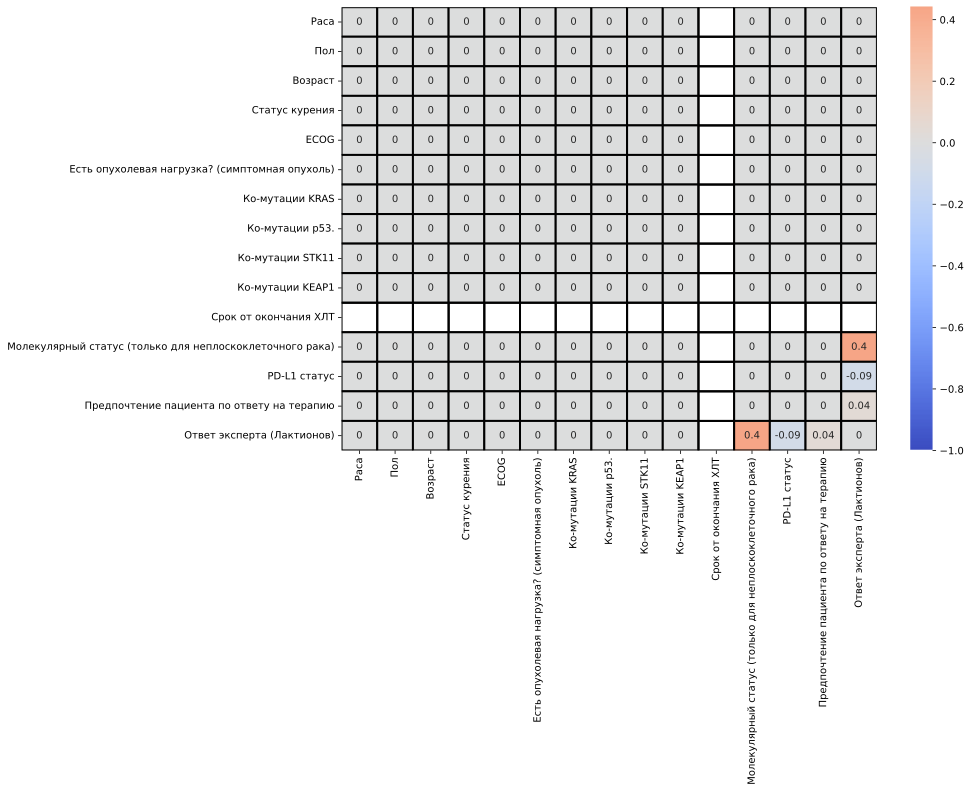

In [185]:
# Посмотрим на корреляцию для столбца Срок от окончания ХЛТ
corr_matrix = categorical[categorical['Срок от окончания ХЛТ'] == 1].corr('spearman')\
- categorical[categorical['Срок от окончания ХЛТ'] == 3].corr('spearman')
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g')

<Axes: >

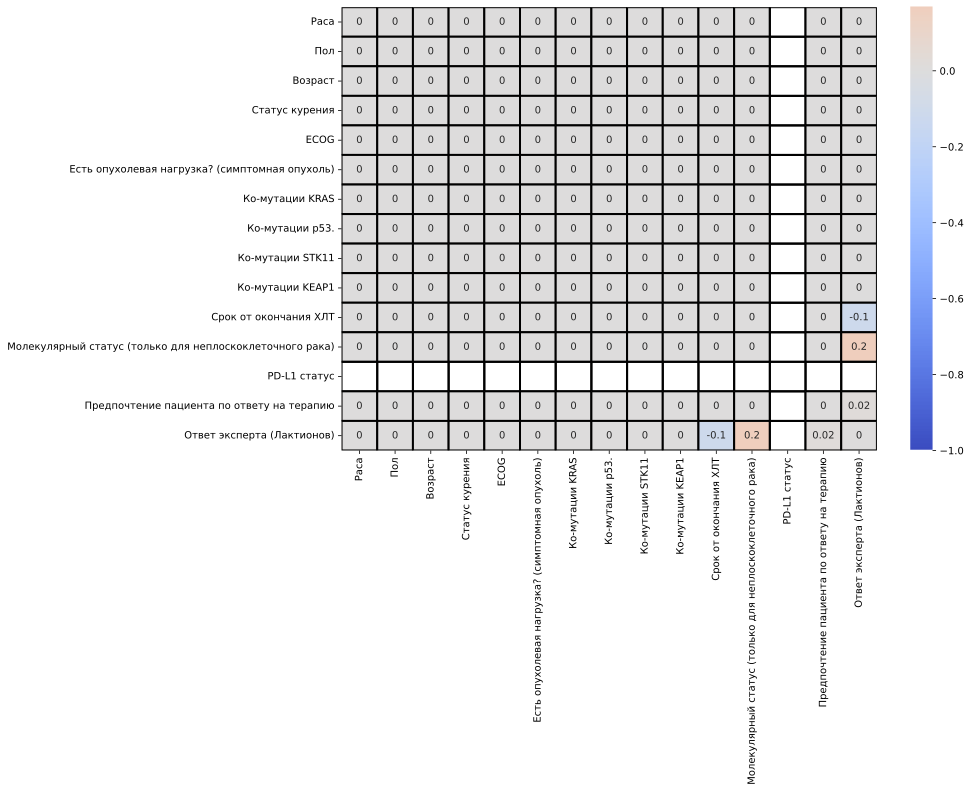

In [186]:
# Посмотрим на корреляцию для столбца PD-L1 статус
corr_matrix = categorical[categorical['PD-L1 статус'] == 1].corr('spearman')\
- categorical[categorical['PD-L1 статус'] == 3].corr('spearman')
sns.heatmap(corr_matrix, cmap= 'coolwarm', vmin=-1, center=0, linewidths=2,
            linecolor='black', annot = True, fmt='.1g')

# Выявление лишних признаков с помощью feature_selection, chi2


## Feature Selection

In [187]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV


In [188]:
clf = LassoCV(cv=5)

In [246]:
X = categorical[['Раса','Пол', 'Возраст','Статус курения','ECOG', 'Есть опухолевая нагрузка? (симптомная опухоль)','Ко-мутации KRAS', 'Ко-мутации p53.', 'Ко-мутации STK11','Ко-мутации KEAP1',\
                 'Срок от окончания ХЛТ', 	'Молекулярный статус (только для неплоскоклеточного рака)', 	'PD-L1 статус', 	'Предпочтение пациента по ответу на терапию']]
y = categorical['Ответ эксперта (Лактионов)']

In [190]:
sfm = SelectFromModel(clf)
sfm.fit(X,y)

SelectFromModel(estimator=LassoCV(cv=5))

In [191]:
SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
                                 positive=False, precompute='auto', random_state=None,selection= 'cyclic', tol=0.0001, verbose=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

SelectFromModel(estimator=LassoCV(cv=5))

In [192]:
n_features = sfm.transform(X).shape[1]

In [193]:
n_features

4

In [194]:
sfm.transform(X)

array([[1, 1, 1, 1],
       [2, 1, 1, 1],
       [3, 1, 1, 1],
       ...,
       [1, 6, 3, 2],
       [2, 6, 3, 2],
       [3, 6, 3, 2]])

In [195]:
sfm.get_support()

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True])

## chi2

In [196]:
from sklearn.feature_selection import SelectKBest, chi2

In [197]:
# Выбираем 3 признака с наивысшим "хи-квадрат".
chi2_features = SelectKBest(chi2, k = 3)
X_kbest_features = chi2_features.fit_transform(X, y)

# Вывод "до и после"
print("Количество признаков до преобразования:", X.shape[1])
print("Количество признаков после преобразования:", X_kbest_features.shape[1])
chi2_features.get_feature_names_out()

Количество признаков до преобразования: 14
Количество признаков после преобразования: 3


array(['Срок от окончания ХЛТ',
       'Молекулярный статус (только для неплоскоклеточного рака)',
       'Предпочтение пациента по ответу на терапию'], dtype=object)

## Вывод

Наиболее зависимые признаки: 'Срок от окончания ХЛТ' (в меньшей степени), 	'Молекулярный статус (только для неплоскоклеточного рака)', 	'PD-L1 статус', 'Предпочтение пациента по ответу на терапию'. Особую важность имеет столбец 'Молекулярный статус (только для неплоскоклеточного рака)'.


# Делим таблицу на x-data и y_data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_data = categorical.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
x_data.head(5)

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,2,1,1,1
2,1,1,1,1,1,1,1,1,1,1,3,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,2,1,1
4,1,1,1,1,1,1,1,1,1,1,2,2,1,1


In [20]:
y_data = categorical.iloc[:, [14]]
y_data.head(5)


,Ответ эксперта (Лактионов)
0,1
1,1
2,2
3,3
4,3


In [250]:
y_data.nunique()

Ответ эксперта (Лактионов)    9
dtype: int64

# Обучение нейросети


In [21]:
# Подключение нужных слоев из модуля tensorflow.keras.layers

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization


In [26]:
# Задание константы количества распознаваемых классов

CLASS_COUNT = 10

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_data, # ----------------- датасет с изображениям
                                                    y_data, # ----------------- датасет с метками
                                                    test_size = 0.1, # --- процент тестовых значений
                                                    shuffle=True, # ------ перемешивание
                                                    random_state=42) # ---

print('Обучающая выборка данных', len(x_train))
print('Обучающая выборка меток', len(y_train))
print()
print('Тестовая выборка данных', len(x_test))
print('Тестовая выборка меток', len(y_test))

Обучающая выборка данных 223948
Обучающая выборка меток 223948

Тестовая выборка данных 24884
Тестовая выборка меток 24884


In [24]:
print(x_train.shape)
print(y_train.shape)

(223948, 14)
(223948, 1)


In [27]:
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train, CLASS_COUNT)
y_test = utils.to_categorical(y_test, CLASS_COUNT)

Теперь выходные данные для вашей нейронной сети выглядят следующим образом:

In [28]:
# Вывод формы y_train
print(y_train.shape)

(223948, 10)


In [34]:
model = Sequential()

model.add(Dense(140, input_dim=14, activation='relu', name='Class_2'))  # полносвязный слой
model.add(Dropout(0.3))
model.add(Dense(CLASS_COUNT, activation='softmax', name='Class_4'))  # выходной полносвязный слой,
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Class_2 (Dense)             (None, 140)               2100      
                                                                 
 dropout_4 (Dropout)         (None, 140)               0         
                                                                 
 Class_4 (Dense)             (None, 10)                1410      
                                                                 
Total params: 3510 (13.71 KB)
Trainable params: 3510 (13.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
store_learning = model.fit(x_train,
                  y_train,
                  batch_size=100,
                  epochs=10,
                  validation_split=0.2,  # 20% использовать для проверки,
                  shuffle=True,
                  verbose=1)

Epoch 1/10
1792/1792 [==============================] - 10s 5ms/step - loss: 1.0772 - accuracy: 0.6088 - val_loss: 0.6686 - val_accuracy: 0.7629
Epoch 2/10
1792/1792 [==============================] - 7s 4ms/step - loss: 0.5760 - accuracy: 0.8029 - val_loss: 0.3572 - val_accuracy: 0.8965
Epoch 3/10
1792/1792 [==============================] - 7s 4ms/step - loss: 0.3599 - accuracy: 0.8870 - val_loss: 0.2062 - val_accuracy: 0.9542
Epoch 4/10
1792/1792 [==============================] - 7s 4ms/step - loss: 0.2508 - accuracy: 0.9239 - val_loss: 0.1287 - val_accuracy: 0.9852
Epoch 5/10
1792/1792 [==============================] - 7s 4ms/step - loss: 0.1860 - accuracy: 0.9461 - val_loss: 0.0882 - val_accuracy: 0.9908
Epoch 6/10
1792/1792 [==============================] - 6s 4ms/step - loss: 0.1465 - accuracy: 0.9593 - val_loss: 0.0654 - val_accuracy: 0.9911
Epoch 7/10
1792/1792 [==============================] - 7s 4ms/step - loss: 0.1199 - accuracy: 0.9675 - val_loss: 0.0518 - val_accuracy

In [36]:
print(store_learning.history)

{'loss': [1.0771639347076416, 0.5759583711624146, 0.35985657572746277, 0.25082653760910034, 0.185967817902565, 0.14651364088058472, 0.1199268028140068, 0.10134194791316986, 0.0882086530327797, 0.07868565618991852], 'accuracy': [0.6087587475776672, 0.8029392957687378, 0.8869880437850952, 0.9239330887794495, 0.9460643529891968, 0.9592538475990295, 0.9675425887107849, 0.9726777672767639, 0.977182149887085, 0.9800678491592407], 'val_loss': [0.6686423420906067, 0.3571987748146057, 0.20615528523921967, 0.12869876623153687, 0.08821578323841095, 0.06542891263961792, 0.05176735669374466, 0.03743872418999672, 0.030710062012076378, 0.025190137326717377], 'val_accuracy': [0.762915849685669, 0.8964501023292542, 0.954186201095581, 0.9851529598236084, 0.9908238649368286, 0.9910694360733032, 0.9974994659423828, 0.9992408752441406, 0.9994418621063232, 0.9998660683631897]}


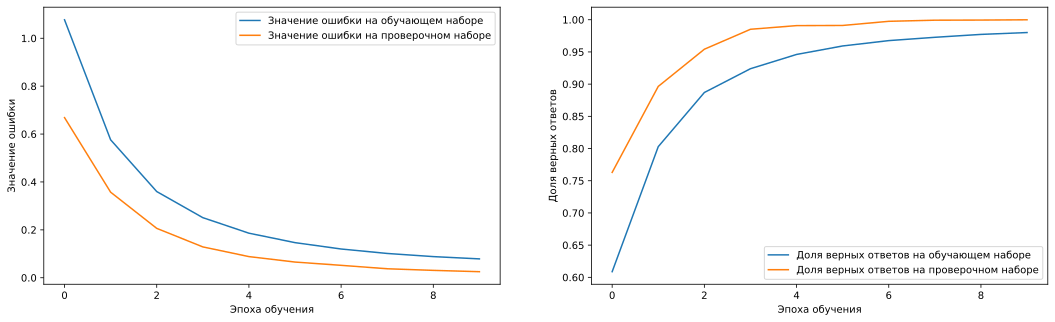

In [37]:
# Создание полотна для рисунка
plt.figure(1, figsize=(18, 5))

# Задание первой (левой) области для построения графиков
plt.subplot(1, 2, 1)
# Отрисовка графиков 'loss' и 'val_loss' из значений словаря store_learning.history
plt.plot(store_learning.history['loss'],
         label='Значение ошибки на обучающем наборе')
plt.plot(store_learning.history['val_loss'],
         label='Значение ошибки на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()

# Задание второй (правой) области для построения графиков
plt.subplot(1, 2, 2)
# Отрисовка графиков 'accuracy' и 'val_accuracy' из значений словаря store_learning.history
plt.plot(store_learning.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(store_learning.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
# Задание подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()

# Фиксация графиков и рисование всей картинки
plt.show()

In [38]:
scores = model.evaluate(x_test,
                        y_test,
                        verbose=1
                        )

778/778 [==============================] - 2s 3ms/step - loss: 0.0255 - accuracy: 0.9998


In [39]:
print(type(scores))
print(scores)

<class 'list'>
[0.025507530197501183, 0.9998392462730408]


In [40]:
print('Процент верных ответов на тестовых данных:', round(scores[1],2) * 100, '%')

Процент верных ответов на тестовых данных: 100.0 %
